In [6]:
import pandas as pd
import re
import matplotlib as plt
import numpy as np

In [7]:
dat = pd.read_csv('club_games_data.csv')

In [171]:
dat_high = dat.loc[(dat['white_rating'] > 2100) | (dat['black_rating'] > 2100)]
#dat_low = dat.loc[(dat['white_rating'] < 1000) | (dat['black_rating'] < 1100)]

In [160]:
dat_low

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,...,Missing60,Missing61,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over
223,learninggames,-TexasT-,https://api.chess.com/pub/player/learninggames,https://api.chess.com/pub/player/-texast-,857,821,win,timeout,blitz,300,...,14,14,14,14,14,14,14,14,15,15
224,-TexasT-,zardara,https://api.chess.com/pub/player/-texast-,https://api.chess.com/pub/player/zardara,829,817,win,checkmated,blitz,300,...,11,11,12,12,13,14,14,14,14,14
225,zardara,-TexasT-,https://api.chess.com/pub/player/zardara,https://api.chess.com/pub/player/-texast-,809,837,timeout,win,blitz,300,...,17,17,18,19,20,20,20,20,20,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,...,13,14,15,16,17,17,17,17,17,17
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,...,13,14,14,14,14,14,14,14,14,14
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over


In [9]:
dat['moves'] = dat['pgn'].apply(lambda x: (x.split('\n\n'))[1])
dat

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,moves
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. ...
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 a6 5. d4 ...
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",1. d4 d5 2. e3 c6 3. c4 dxc4 4. Bxc4 b5 5. Bb3...
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",1. e4 c5 2. b3 Nc6 3. a4 d6 4. Bb5 Bd7 5. Qf3 ...
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",1. d4 e6 2. c4 Qf6 3. Nf3 d6 4. Bg5 Qg6 5. Nc3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,chess,True,1k1q1bnr/p1pb2pp/Bp2p3/3pPp2/3P4/N1P2N2/1P3PPP...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1. e4 {[%clk 0:05:00]} 1... e6 {[%clk 0:04:56....
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,chess,True,8/p7/k1p5/1pP4p/1K1P4/1PN1Q3/1r3n1q/8 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1. e4 {[%clk 0:04:59.6]} 1... e5 {[%clk 0:04:5...
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,chess,True,3r1rk1/5p2/1PRp2p1/2nNp2p/4P3/3P2PR/3b2K1/8 w - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:58....
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,chess,True,r3kb1r/pp1q1p2/2npbN1p/2p1p1p1/2P1P3/3P2PN/PP3...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1. e4 {[%clk 0:04:57]} 1... c5 {[%clk 0:04:58....


In [10]:
def game_to_moves(game):
    testmoves = game.split(' ')
    newmoves = [x for x in testmoves if not re.search(r'[:{}]+',x)]
    newmoves = [x for x in newmoves if not '...' in x]
    justmoves=[]
    for i in range(0,len(newmoves)):
        if i % 3 != 0:
            justmoves.append(newmoves[i])
    return justmoves

In [11]:
dat['all_moves'] = dat['moves'].apply(lambda x: game_to_moves(x))

In [12]:
dat['all_moves']

0        [d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+, Qxc3, ...
1        [e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6, d4, exd4,...
2        [d4, d5, e3, c6, c4, dxc4, Bxc4, b5, Bb3, a5, ...
3        [e4, c5, b3, Nc6, a4, d6, Bb5, Bd7, Qf3, Nd4, ...
4        [d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6, Nc3, c6, ...
                               ...                        
66874    [e4, e6, d4, d5, e5, f5, Nf3, Nc6, c3, Bd7, Qb...
66875    [e4, e5, c4, Nc6, d3, Nf6, g3, d6, Nh3, Bg4, B...
66876    [e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5, O-O, Bh3...
66877    [e4, c5, d3, Nc6, c4, e5, Nc3, Nf6, g3, d6, Nh...
66878    [e4, e5, f4, d6, fxe5, dxe5, Nf3, Bd6, d4, c5,...
Name: all_moves, Length: 66879, dtype: object

In [13]:
### Descriptive aspects of the set

<AxesSubplot:title={'center':'Rating Distribution'}, xlabel='Elo Rating', ylabel='Count'>

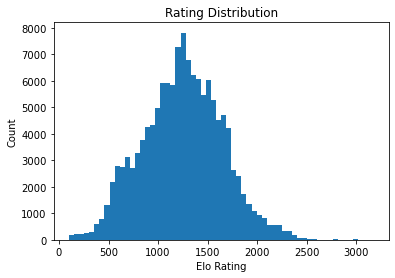

In [14]:
white = dat['white_rating']
black = dat['black_rating']
grey = white.append(black)

ax = grey.hist(bins=60,grid=False)
ax.set_title('Rating Distribution')
ax.set_xlabel('Elo Rating')
ax.set_ylabel('Count')
ax

In [15]:
grey.agg(['mean','std'])

mean    1247.28423
std      403.72266
dtype: float64

<AxesSubplot:title={'center':'Elo Differentials'}, xlabel='Elo Difference', ylabel='Count'>

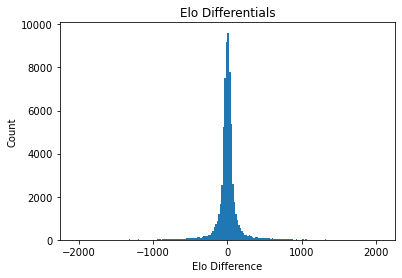

In [16]:
dat['difference'] = dat['white_rating'] - dat['black_rating']
ax = dat['difference'].hist(bins=200,grid=False)
ax.set_title('Elo Differentials')
ax.set_xlabel('Elo Difference')
ax.set_ylabel('Count')
ax

<AxesSubplot:title={'center':'Number of Moves Made'}, xlabel='Number', ylabel='Count'>

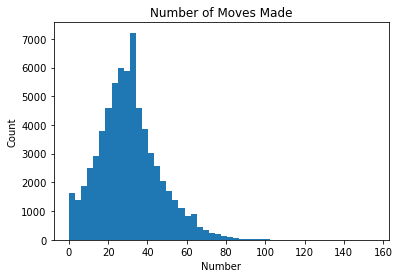

In [17]:
dat['lens'] = dat['all_moves'].apply(lambda x: len(x)//2)
ax = dat['lens'].hist(bins=50,grid=False)
ax.set_title('Number of Moves Made')
ax.set_xlabel('Number')
ax.set_ylabel('Count')
ax

<AxesSubplot:>

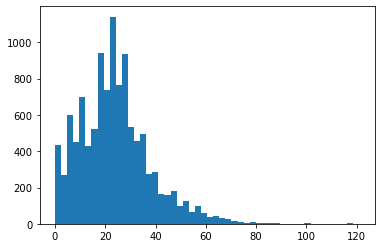

In [18]:
dat['lens'].loc[(dat['white_rating'] < 800) | (dat['black_rating'] < 800)].hist(bins=50,grid=False)

In [19]:
def extract_first_n(my_list,n):
    return my_list[0:n]

In [20]:
new_list = [1,2,3,4,5,6,7,8,9,10]

extract_first_n(new_list,2)

[1, 2]

In [21]:
wr = dat['white_result'].value_counts()

In [198]:
wrh = dat['white_result'].loc[(dat['white_rating'] > 2100) | (dat['black_rating'] > 2100)].value_counts()

In [22]:
br = dat['black_result'].value_counts()

In [199]:
brh = dat['black_result'].loc[(dat['white_rating'] > 2100) | (dat['black_rating'] > 2100)].value_counts()

In [23]:
wr = wr.to_frame()

In [24]:
br = br.to_frame()

In [200]:
wrh = wrh.to_frame()
brh = brh.to_frame()

In [202]:
brh

,black_result
win,800
resigned,328
timeout,249
checkmated,195
repetition,23
timevsinsufficient,20
insufficient,11
agreed,8
stalemate,7
abandoned,6


In [26]:
wrbr = wr.merge(br,left_index=True,right_index=True)

In [203]:
wrbrh = wrh.merge(brh,left_index=True,right_index=True)

In [27]:
wrbr = wrbr.head(5)

<AxesSubplot:>

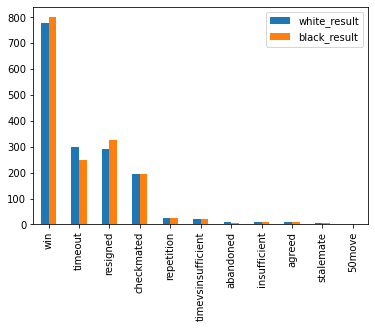

In [204]:
wrbrh.plot.bar()

In [29]:
dat['two'] = dat['all_moves'].apply(lambda x: extract_first_n(x,8))

In [30]:
dat['two']

0        [d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+]
1           [e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6]
2           [d4, d5, e3, c6, c4, dxc4, Bxc4, b5]
3            [e4, c5, b3, Nc6, a4, d6, Bb5, Bd7]
4           [d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6]
                          ...                   
66874         [e4, e6, d4, d5, e5, f5, Nf3, Nc6]
66875         [e4, e5, c4, Nc6, d3, Nf6, g3, d6]
66876      [e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5]
66877        [e4, c5, d3, Nc6, c4, e5, Nc3, Nf6]
66878     [e4, e5, f4, d6, fxe5, dxe5, Nf3, Bd6]
Name: two, Length: 66879, dtype: object

In [97]:
dat['all_moves'][40]

['e4',
 'c5',
 'Bc4',
 'e6',
 'e5',
 'Nc6',
 'Nf3',
 'd5',
 'exd6',
 'Bxd6',
 'Bb5',
 'Ne7',
 'd4',
 'a6',
 'Ba4',
 'Qa5+',
 'Nc3',
 'b5',
 'dxc5',
 'Bxc5',
 'Bb3',
 'O-O',
 'Bd2',
 'Qc7',
 'Ne4',
 'Bb6',
 'O-O',
 'Rd8',
 'Nfg5',
 'Nd5',
 'Qh5',
 'h6',
 'Nh3',
 'Qe5',
 'Qg4',
 'Nf6',
 'Nxf6+',
 'Qxf6',
 'Rad1',
 'e5',
 'Qg3',
 'Nd4',
 'Rde1',
 'Nxb3',
 'axb3',
 'Rxd2',
 'Rxe5',
 'Bxh3',
 'gxh3',
 'Bc7',
 'Qe3',
 'Qxe5',
 'Qxe5',
 '1-0\n']

In [31]:
def piece_taken(game):
    count = 0
    taken_count=[]
    for i in game:
        if "x" in i:
            count +=1
        taken_count.append(count)
    return taken_count

In [32]:
mygame=['f','f','f','f','f','f','x','f','f','x','x','f']
piece_taken(mygame)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3]

In [47]:
dat['pieces_taken'] = dat['all_moves'].apply(lambda x: piece_taken(x))
dat['pieces_taken'].head()

0    [0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, ...
2    [0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: pieces_taken, dtype: object

In [109]:
def get_piece(game,n):
    if game == []:
        return 'Bad'
    else:
        if n > len(game)-1:
            return "Game Over"
        else:
            return game[n]
    

In [110]:
mygame=['f','f','f','f','f','f','x','f','f','x','x','f']

get_piece(mygame,200)

'Game Over'

In [129]:
def generatedf(in_df,n):
    row_name = 'Missing'+str(n)
    dat[row_name] = dat['pieces_taken'].apply(lambda x: get_piece(x,n))
    new_col = dat[row_name].value_counts().to_frame()
    out_df = pd.concat([in_df,new_col],axis=1)
    return out_df

In [131]:
my_new_df = zero
my_new_df

,pieces_taken0
0,66368
Bad,493
1,18


In [172]:
# Sub frame

zero_high = dat_high['pieces_taken0'].value_counts().to_frame()

def generate_df_sub(orig_fr,in_df,n):
    row_name = 'Missing'+str(n)
    new_col = orig_fr[row_name].value_counts().to_frame()
    out_df = pd.concat([in_df,new_col],axis=1)
    return out_df

my_new_df_high = zero_high
for i in range(1,70):
    my_new_df_high = generate_df_sub(dat_high,my_new_df_high,i)
    
my_new_df_high

,pieces_taken0,Missing1,Missing2,Missing3,Missing4,Missing5,Missing6,Missing7,Missing8,Missing9,...,Missing60,Missing61,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69
0,1648.0,1647.0,1564.0,1492.0,1368.0,1161.0,1045.0,928.0,840.0,756.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bad,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Game Over,NaN,1.0,5.0,5.0,6.0,6.0,8.0,8.0,12.0,12.0,...,652.0,652.0,694.0,694.0,741.0,741.0,777.0,777.0,820.0,820.0
1,NaN,NaN,79.0,109.0,195.0,300.0,219.0,213.0,197.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,42.0,79.0,175.0,353.0,449.0,507.0,560.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,6.0,23.0,42.0,77.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,15.0,49.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,6.0,4.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [132]:
# generatedf(zero,1)

my_new_df = zero
for i in range(1,70):
    my_new_df = generatedf(my_new_df,i)
    
my_new_df

,pieces_taken0,Missing1,Missing2,Missing3,Missing4,Missing5,Missing6,Missing7,Missing8,Missing9,...,Missing60,Missing61,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69
0,66368.0,66331.0,62260.0,58049.0,52898.0,46519.0,42015.0,37455.0,33098.0,29088.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Bad,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,...,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0
1,18.0,33.0,3505.0,5564.0,8759.0,11031.0,9529.0,9694.0,9100.0,8756.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,16.0,21.0,2164.0,3830.0,7601.0,12720.0,15330.0,17377.0,19270.0,...,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Game Over,NaN,6.0,599.0,603.0,882.0,884.0,1134.0,1135.0,1563.0,1564.0,...,35480.0,35480.0,37390.0,37390.0,39175.0,39175.0,40991.0,40992.0,42691.0,42692.0
3,NaN,NaN,1.0,5.0,13.0,344.0,875.0,2402.0,3840.0,4777.0,...,6.0,4.0,4.0,6.0,4.0,1.0,1.0,1.0,1.0,1.0
4,NaN,NaN,NaN,1.0,3.0,5.0,109.0,360.0,1380.0,2773.0,...,24.0,21.0,19.0,17.0,19.0,18.0,12.0,10.0,8.0,7.0
5,NaN,NaN,NaN,NaN,1.0,2.0,4.0,8.0,24.0,151.0,...,36.0,27.0,22.0,18.0,11.0,14.0,16.0,15.0,14.0,10.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,5.0,...,99.0,92.0,74.0,66.0,51.0,37.0,30.0,25.0,17.0,18.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,124.0,97.0,78.0,63.0,58.0,53.0,48.0,38.0,33.0,28.0


In [173]:
my_new_df_high = my_new_df_high.drop('Bad')
my_new_df_high

,pieces_taken0,Missing1,Missing2,Missing3,Missing4,Missing5,Missing6,Missing7,Missing8,Missing9,...,Missing60,Missing61,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69
0,1648.0,1647.0,1564.0,1492.0,1368.0,1161.0,1045.0,928.0,840.0,756.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Game Over,NaN,1.0,5.0,5.0,6.0,6.0,8.0,8.0,12.0,12.0,...,652.0,652.0,694.0,694.0,741.0,741.0,777.0,777.0,820.0,820.0
1,NaN,NaN,79.0,109.0,195.0,300.0,219.0,213.0,197.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,42.0,79.0,175.0,353.0,449.0,507.0,560.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,6.0,23.0,42.0,77.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,15.0,49.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,6.0,4.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,23.0,18.0,16.0,11.0,9.0,7.0,5.0,5.0,5.0


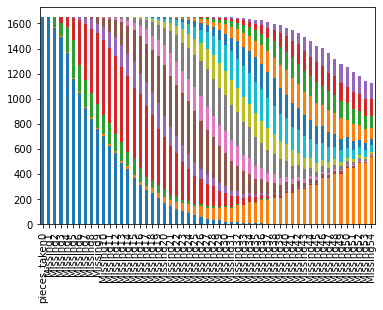

In [176]:
ax = my_new_df_high.head(15).transpose().head(55).plot.bar(stacked=True,legend=False)

In [117]:
dat['pieces_taken50'] = dat['pieces_taken'].apply(lambda x: get_piece(x,50))

<AxesSubplot:>

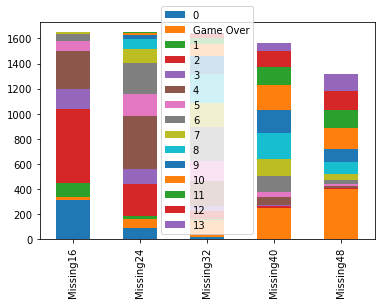

In [228]:
my_new_df_high[['Missing16','Missing24','Missing32','Missing40','Missing48']].head(15).transpose().plot.bar(stacked=True)

In [229]:
my_new_df[['Missing16','Missing24','Missing32','Missing40','Missing48']].head(15).transpose().plot.bar(stacked=True)

KeyError: "None of [Index(['Missing16', 'Missing24', 'Missing32', 'Missing40', 'Missing48'], dtype='object')] are in the [columns]"

In [118]:
dat['pieces_taken50'].value_counts()

Game Over    25566
13            5280
14            5099
12            4988
15            4275
11            4189
10            3509
16            3446
17            2240
9             2189
8             1636
18            1257
7              762
19             607
6              553
Bad            493
20             254
5              191
4              149
21              78
3               35
2               32
22              28
23               8
1                6
0                5
24               3
25               1
Name: pieces_taken50, dtype: int64

In [123]:
fifty = dat['pieces_taken50'].value_counts().to_frame()
zero = dat['pieces_taken0'].value_counts().to_frame()

In [126]:
zerofifth = pd.concat([zero,fifty],axis=1)

In [128]:
zero

,pieces_taken0
0,66368
Bad,493
1,18


In [66]:
dat['pieces_taken']
    

0        [0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3, ...
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, ...
2        [0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...
3        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
66874    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
66875    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, ...
66876    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...
66877    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
66878    [0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, ...
Name: pieces_taken, Length: 66879, dtype: object

In [72]:
for i in dat['pieces_taken']:
    print(i[0])

0
0
0
0
0
0


IndexError: list index out of range

In [75]:
dat['pieces_taken'][6]

[]

In [178]:
def pieces_terminal(game):
    if game == []:
        return "Bad"
    else:
        return game[-1]
    
    

In [179]:
game = [1,5,3,7,6,8]
pieces_terminal(game)

8

In [180]:
dat['terminal'] = dat['pieces_taken'].apply(lambda x: pieces_terminal(x))

In [186]:
dat['combined_rating']

0        3316
1        3303
2        2569
3        2546
4        2845
         ... 
66874    1767
66875    1822
66876    1828
66877    1861
66878    1846
Name: combined_rating, Length: 66879, dtype: int64

In [182]:
dat['combined_rating'] = dat['black_rating'] + dat['white_rating']

In [194]:
dat = dat[dat.terminal != "Bad"]

<AxesSubplot:xlabel='combined_rating', ylabel='terminal'>

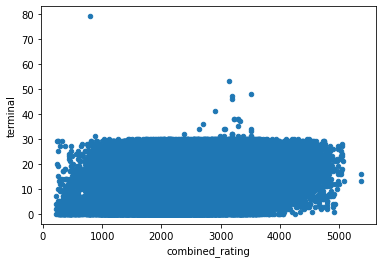

In [196]:
dat.plot(x='combined_rating',y='terminal',kind="scatter")

In [192]:
x_ax = dat['combined_rating'].tolist()
y_ax = dat['terminal'].tolist()

In [193]:
y_ax

[11,
 20,
 5,
 9,
 12,
 15,
 'Bad',
 0,
 5,
 23,
 8,
 29,
 12,
 12,
 7,
 18,
 15,
 9,
 8,
 29,
 15,
 9,
 17,
 9,
 10,
 12,
 6,
 0,
 'Bad',
 2,
 0,
 3,
 5,
 5,
 2,
 5,
 0,
 7,
 3,
 1,
 14,
 18,
 2,
 1,
 10,
 3,
 2,
 0,
 2,
 3,
 2,
 2,
 6,
 15,
 4,
 7,
 12,
 12,
 11,
 'Bad',
 'Bad',
 0,
 0,
 'Bad',
 'Bad',
 0,
 0,
 'Bad',
 'Bad',
 0,
 'Bad',
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 12,
 12,
 12,
 10,
 29,
 11,
 11,
 2,
 23,
 10,
 12,
 17,
 10,
 9,
 29,
 18,
 6,
 5,
 11,
 23,
 10,
 14,
 6,
 10,
 17,
 12,
 15,
 16,
 10,
 0,
 10,
 11,
 11,
 9,
 22,
 12,
 7,
 7,
 18,
 29,
 1,
 8,
 9,
 23,
 10,
 8,
 7,
 22,
 12,
 25,
 0,
 19,
 15,
 3,
 28,
 15,
 25,
 25,
 12,
 10,
 12,
 9,
 18,
 19,
 16,
 11,
 18,
 13,
 6,
 11,
 20,
 16,
 14,
 12,
 12,
 20,
 7,
 3,
 21,
 21,
 17,
 6,
 3,
 5,
 22,
 25,
 9,
 19,
 24,
 7,
 21,
 20,
 12,
 23,
 15,
 14,
 17,
 14,
 23,
 12,
 18,
 20,
 27,
 6,
 10,
 21,
 22,
 16,
 12,
 13,
 18,
 13,
 17,
 17,
 16,
 14,
 14,
 9,
 12,
 29,
 13,
 14,
 29,
 11,
 16,
 21,
 14,
 14,
 9,
 12,
 16,
 1

In [215]:
dat['terminal'].loc[(dat['white_rating'] < 1200) | (dat['black_rating'] < 1200)].value_counts()

16    1677
15    1660
14    1633
13    1539
12    1532
17    1501
18    1438
11    1430
10    1301
19    1297
9     1209
8     1177
20    1151
0     1135
7     1090
6     1035
21    1009
5      933
4      902
22     901
23     831
3      772
2      722
24     680
25     605
1      598
26     503
27     401
28     396
29     332
30      63
34       1
36       1
32       1
31       1
79       1
Name: terminal, dtype: int64

In [209]:
dat['terminal'].loc[(dat['white_rating'] < 1200) | (dat['black_rating'] < 1200)].value_counts()

16    1677
15    1660
14    1633
13    1539
12    1532
17    1501
18    1438
11    1430
10    1301
19    1297
9     1209
8     1177
20    1151
0     1135
7     1090
6     1035
21    1009
5      933
4      902
22     901
23     831
3      772
2      722
24     680
25     605
1      598
26     503
27     401
28     396
29     332
30      63
34       1
36       1
32       1
31       1
79       1
Name: terminal, dtype: int64

In [217]:
dat

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,...,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69,terminal,combined_rating
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,11,3316
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,...,19,19,20,20,Game Over,Game Over,Game Over,Game Over,20,3303
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,5,2569
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,9,2546
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,12,2845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,5,1767
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,...,15,16,17,17,17,17,17,17,18,1822
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,...,14,14,14,14,14,14,14,14,14,1828
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,1,1861


In [230]:
dat

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,...,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69,terminal,combined_rating
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,11,3316
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,...,19,19,20,20,Game Over,Game Over,Game Over,Game Over,20,3303
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,5,2569
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,9,2546
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,12,2845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,5,1767
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,...,15,16,17,17,17,17,17,17,18,1822
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,...,14,14,14,14,14,14,14,14,14,1828
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,1,1861


In [235]:
dat['terminal'].loc[(dat['white_rating'] > 2100) & (dat['black_rating'] > 2100)].agg(['mean','std'])

mean    17.500502
std      6.279409
Name: terminal, dtype: float64

In [237]:
dat['terminal'].loc[(dat['white_rating'] < 1200) & (dat['black_rating'] < 1200)].loc[('white_result' == 'resigned') | (('black_result' == 'resigned'))].agg(['mean','std'])

KeyError: 'False: boolean label can not be used without a boolean index'

In [241]:
dat['terminal'].loc[(dat['white_result'] == 'resigned') | (dat['black_result'] == 'resigned')].agg(['mean','std'])

mean    13.274219
std      6.877149
Name: terminal, dtype: float64

<AxesSubplot:>

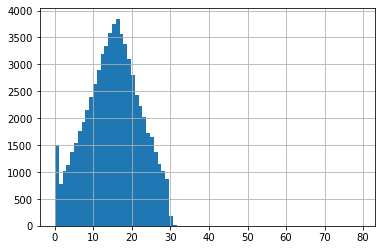

In [244]:
dat['terminal'].hist(bins=80)

In [245]:
dat

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,...,Missing62,Missing63,Missing64,Missing65,Missing66,Missing67,Missing68,Missing69,terminal,combined_rating
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,11,3316
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,...,19,19,20,20,Game Over,Game Over,Game Over,Game Over,20,3303
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,5,2569
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,9,2546
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,12,2845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,5,1767
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,...,15,16,17,17,17,17,17,17,18,1822
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,...,14,14,14,14,14,14,14,14,14,1828
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,...,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,Game Over,1,1861
